# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [2]:
# importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# leer conjuntos de datos en los DataFrames
df_aisles = pd.read_csv('aisles.csv', sep=';')
df_departments = pd.read_csv('departments.csv', sep=';')
df_instacar_orders = pd.read_csv('instacart_orders.csv', sep=';')
df_order_products = pd.read_csv('order_products.csv', sep=';')
df_products = pd.read_csv('products.csv', sep=';')

In [4]:
# mostrar información del DataFrame
df_aisles.info() 
df_aisles.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
# mostrar información del DataFrame
df_departments.info() 
df_departments.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
# mostrar información del DataFrame
df_instacar_orders.info() 
df_instacar_orders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [7]:
# mostrar información del DataFrame
df_order_products.info(show_counts=True) 
df_order_products.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [8]:
# mostrar información del DataFrame
df_products.info() 
df_products.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
df_products['aisle_id']

0         61
1        104
2         94
3         38
4          5
        ... 
49689     64
49690    130
49691    130
49692    127
49693     38
Name: aisle_id, Length: 49694, dtype: int64

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

En primera instancia, se pudo constatar en los datos que se tienen: 
-existencia de caracteres especiales en los strings del nombre del producto, 
-existencia de 15 registros duplicados en el dataset de instacar_order,
-presencia de celdas con datos faltantes, tal y como ocurre en la tabla products, en la fila, en el producto 5833, 
por otra parte, los registros están separados por el signo de ;, lo cual conlleva leer los datasets indicando el separador ;.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

- `Lista de acciones:`
    - `1`: Examinar los nombres de las columnas para detectar inconsistencias
    - `2`: Abordar los valores duplicados y mitigar sus efectos con las herramientas que se tienen.
    - `3`: Afrontar los valores ausentes.
    - `4`: Como último paso (tal vez), y en aras de redondear una etapa de Preprocesamiento más acabada, se podría considerar incluir la exploración y detección de datos atípicos (outliers) y su mitigación, así como la identificación de datos desbalanceados si fuera el caso.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [10]:
# Revisa si hay pedidos duplicados
print(df_aisles.duplicated().sum())
print(df_departments.duplicated().sum())
print(df_instacar_orders.duplicated().sum())
print(df_order_products.duplicated().sum())
print(df_products.duplicated().sum())

0
0
15
0
0


In [11]:
df_instacar_orders[df_instacar_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
- `Resultado`: Los 15 registros tienen en común que todos fueron realizados a las 2:00 a.m., y que las órdenes fueron realizadas en el día 3 de la semana en todos los casos, o sea, el miércoles.

In [12]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_instacar_orders[df_instacar_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Qué sugiere este resultado?

Tomando en cuenta que existen 15 filas duplicadas, que todos las órdenes fueron realizadas a la misma hora y el mismo día de la semana en el dataset instacart, el resultado sugiere que a esa hora de ese día ocurrió un comportamiento atípico en las operaciones.

In [13]:
# Elimina los pedidos duplicados
df_instacar_orders = df_instacar_orders.drop_duplicates().reset_index(drop=True)

In [14]:
# Vuelve a verificar si hay filas duplicadas
df_instacar_orders[df_instacar_orders.duplicated()] # Ya NO HAY DUPLICADOS

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [15]:
print(df_instacar_orders.columns ) 

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')


In [16]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
#df_instacar_orders = df_instacar_orders.drop_duplicates(subset='order_id').reset_index(drop=True)
df_instacar_orders.duplicated(subset='order_id').sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

En primera instancia, se pudo constatar en los datos que se tienen: 
-existencia de caracteres especiales en los strings del nombre del producto, 
-existencia de 15 registros duplicados en el dataset de instacar_order,
-presencia de celdas con datos faltantes, tal y como ocurre en la tabla products, en la fila, en el producto 5833, 
por otra parte, los registros están separados por el signo de ;, lo cual conlleva leer los datasets indicando el separador ;.

### `products` data frame

In [17]:
# Verifica si hay filas totalmente duplicadas
print(df_products.duplicated().sum())

0


In [18]:
# Verifica únicamente si hay IDs duplicadas de productos
df_products.duplicated(subset='product_id').sum()

0

In [19]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'] = df_products['product_name'].str.lower()  
df_products.duplicated(subset='product_name').sum() 

1361

In [20]:
df_products.drop_duplicates(subset='product_name').reset_index(drop=True)

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13
...,...,...,...,...
48328,49684,vodka- triple distilled- twist of vanilla,124,5
48329,49685,en croute roast hazelnut cranberry,42,1
48330,49686,artisan baguette,112,3
48331,49687,smartblend healthy metabolism dry cat food,41,8


In [21]:
# Revisa si hay nombres duplicados de productos no faltantes

#Se entiende por producto faltante aquel que exite, pero que sus existencias en almacen son 0.
df_products.duplicated(subset='product_name').sum() 

cond1 = ~df_products['product_name'].notna()
cond2 = df_products['product_name'].duplicated()

# df_products1 = df_products[cond1 & cond2] #Asi no
df_products1 = df_products[cond1 & cond2] #Aplicando las dos condiciones tal y como fue indicado
df_products1

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se encontraron 1361 filas duplicadas en esta tabla, y se aplicó la función drop_duplicates.

### `departments` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
df_departments.duplicated().sum()

0

In [23]:
# Revisa únicamente si hay IDs duplicadas de productos
df_departments.duplicated(subset='department_id').sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encontraron filas totalmente duplicadas ni IDs duplicados de productos.

### `aisles` data frame

In [24]:
# Revisa si hay filas totalmente duplicadas

df_aisles.duplicated().sum()

0

In [25]:
# Revisa únicamente si hay IDs duplicadas de productos
df_aisles.duplicated(subset='aisle_id').sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encontraron filas totalmente duplicadas ni IDs duplicados de productos en el dataset aisles. 

### `order_products` data frame

In [26]:
# Revisa si hay filas totalmente duplicadas
df_order_products.duplicated().sum()

0

In [27]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_order_products.duplicated(subset='order_id').sum()

4094961

Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [28]:
# Encuentra los valores ausentes en la columna 'product_name'
df_products[df_products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

In [29]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_products[(df_products['product_name'].isna() == True) & (df_products['aisle_id'] == 100)].count() 

product_id       1258
product_name        0
aisle_id         1258
department_id    1258
dtype: int64

Describe brevemente cuáles son tus hallazgos.

Sí, todos los nombres de productos están relacionados con el pasillo  con ID 100, siendo el total 1258. 

In [30]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

df_products[(df_products['product_name'].isna() == True) & (df_products['aisle_id'] == 100) & (df_products['department_id'] == 21)].count() 

product_id       1258
product_name        0
aisle_id         1258
department_id    1258
dtype: int64

Describe brevemente cuáles son tus hallazgos.

Sí, todos los nombres de productos están relacionados con el departamento con ID 21, siendo el total 1258.

In [31]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print( df_aisles[df_aisles['aisle_id'] == 100].count())
df_departments[df_departments['department_id'] == 21].count() 

aisle_id    1
aisle       1
dtype: int64


department_id    1
department       1
dtype: int64

Describe brevemente cuáles son tus hallazgos.

Existe un registro en dataset aisle con ID 100 y valor missing, y un registro con ID 21 en department que también está missing. 

In [32]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True) 

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Todas las celdas de los productos ausentes fueron reemplazados con el vocablo 'Unknown'.

### `orders` data frame

In [33]:
# Encuentra los valores ausentes

print(df_instacar_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [34]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

df_instacar_orders.isna().sum()
#El resto de las columnas en esta dataset no tiene datos faltantes, tal y como se puede apreciar los valores faltante sestán en 0.

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Como se puede apreciar existen 28817 registros de celdas ausentes en la columna 'days_since_prior_order', en el resto No existen datos ausentes.

### `order_products` data frame

In [35]:
# Encuentra los valores ausentes

df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [36]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_order_products['add_to_cart_order'].min())
print(df_order_products['add_to_cart_order'].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos.

Como se puede apreciar existen 836 registros de celdas ausentes en la columna 'add_to_cart_order', en el resto de las columnas no existen datos ausentes. Además, se encontró que el valor mínimo de la columna 'add_to_cart_order' es 1 y el valor máximo es 64.

In [37]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
mis_booleans = df_order_products['add_to_cart_order'].isna()
df_order_products[mis_booleans].order_id 
list_lost_values = list(df_order_products[mis_booleans].order_id )
list_lost_values    

[2449164,
 1968313,
 2926893,
 1717990,
 1959075,
 844733,
 61355,
 936852,
 264710,
 1717990,
 1564093,
 129627,
 264710,
 293169,
 2849370,
 1386261,
 3308010,
 903110,
 2136777,
 3347453,
 1888628,
 165801,
 2449164,
 2094761,
 3347453,
 1038146,
 2136777,
 2997021,
 844733,
 844733,
 2136777,
 813364,
 165801,
 2256933,
 171934,
 264710,
 2449164,
 2409109,
 3347453,
 813364,
 2926893,
 936852,
 1730767,
 1169835,
 733526,
 844733,
 293169,
 61355,
 903110,
 1968313,
 733526,
 2136777,
 2926893,
 404157,
 1386261,
 171934,
 3125735,
 747668,
 3308010,
 1169835,
 1800005,
 1961723,
 936852,
 2849370,
 3308010,
 61355,
 871281,
 1717990,
 813364,
 388234,
 61355,
 3125735,
 1959075,
 61355,
 3125735,
 1648217,
 171934,
 3125735,
 61355,
 1477139,
 1959075,
 1717990,
 1717990,
 61355,
 1717990,
 171934,
 1038146,
 3308010,
 3347453,
 102236,
 936852,
 171934,
 1730767,
 2926893,
 1021563,
 1832957,
 1959075,
 2256933,
 1968313,
 2721963,
 293169,
 102236,
 3125735,
 1959075,
 264710,


In [64]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

m1 = df_order_products[df_order_products['order_id'].isin(list_lost_values)]
df_new = m1.groupby(['order_id'])['product_id'].count()
df_new
#df_new.min()

order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64

Describe brevemente cuáles son tus hallazgos.

Luego del conteo de productos en cada pedido, el valor mínimo es 65 productos.

In [39]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'].fillna('999', inplace=True) 
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se encontraron valores ausentes en la columna add_to_cart_order, valores cuyos cuales fueron reemplazados por 999.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

En el Paso 2 que se refiere al Preprocesamiento de los datos, se han ejecutado varias acciones para garantizar la calidad y limpieza de los datos, a saber, identificación y tratamiento de valores faltantes en todas y cada una de las columnas de los datasets a utilizar, sienso sustituidos en algunos casos por Preprocesamiento de los datos y en otros por 999. Además, se chequeó la existencia de valores duplicados, los cuales fueron eliminados, por otro parte, se reconvirtió al tipo entero 
la columna add_to_cart_order en la tabla order_products.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [40]:
df_instacar_orders[( df_instacar_orders['order_hour_of_day'] >= 0) & (df_instacar_orders['order_hour_of_day'] <= 23)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [41]:
number_of_orders_out_or_range1 = ( ~((df_instacar_orders['order_dow'] >= 0) & (df_instacar_orders['order_dow'] <= 23) )  == True).sum()
number_of_orders_out_or_range1

0

In [42]:
df_instacar_orders[( df_instacar_orders['order_dow'] >= 0) & (df_instacar_orders['order_dow'] <= 6)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [43]:
number_of_orders_out_or_range2 = ( ~((df_instacar_orders['order_dow'] >= 0) & (df_instacar_orders['order_dow'] <= 6) )  == True).sum()
number_of_orders_out_or_range2

0

Escribe aquí tus conclusiones

No existen registros que estén fuera del rango sensible, tanto en la columna order_hour_of_day como en la columna order_dow en la tabla instacar_orders, lo cual queda evidenciado en el valor 0 mostrado anteriomente.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<Axes: title={'center': 'Distribución de las compras durante el día'}, xlabel='Horas del día', ylabel='Cantidad de órdenes'>

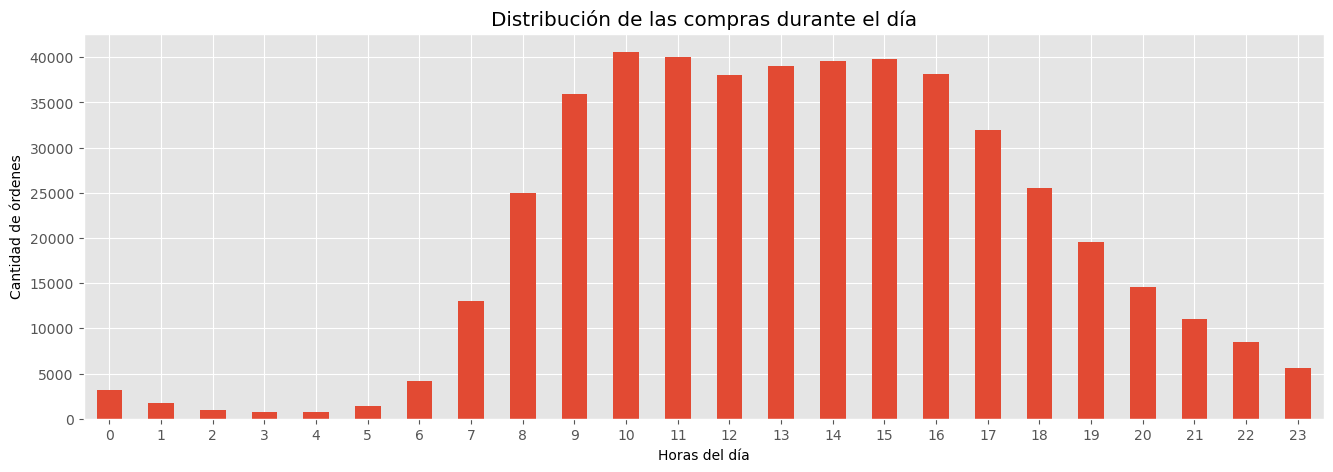

In [44]:
# Dado que se desea mostrar la evolución de compras a largo del tiempo, el tipo de gráfico más adecuado es el Bar chart.
plt.style.use('ggplot')
df_instacar_orders.groupby(['order_hour_of_day'])['user_id'].count().plot( x='order_hour_of_day',
        y='user_id',
        kind='bar',
        title='Distribución de las compras durante el día',
        xlabel='Horas del día',
        ylabel='Cantidad de órdenes',
         figsize=(16,5), rot=0)

Escribe aquí tus conclusiones

Se puede observar que en el rango de horario comprendido entre las 9 am a las 16:00 pm, se produce el mayor volumen de órdenes.

### [A3] ¿Qué día de la semana compran víveres las personas?

<Axes: title={'center': 'Distribución de las compras por día de la semana'}, xlabel='Días de la semana', ylabel='Cantidad de órdenes'>

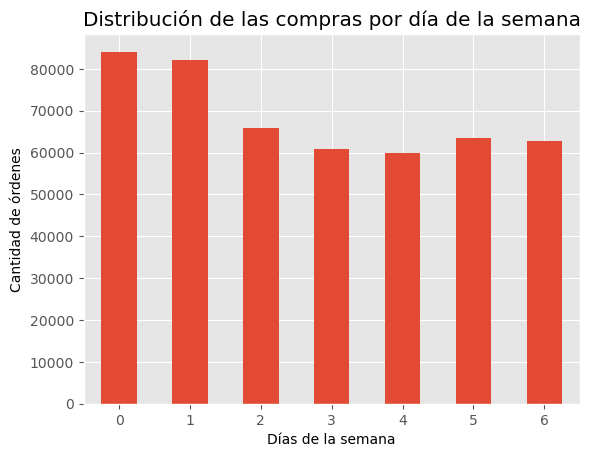

In [45]:
# Dado que se desea mostrar la evolución de compras a largo del tiempo, el tipo de gráfico más adecuado es el Bar chart.
df_instacar_orders.groupby(['order_dow'])['user_id'].count().plot( x='order_dow',
        y='user_id',
        kind='bar',
        title='Distribución de las compras por día de la semana',
        xlabel='Días de la semana',
        ylabel='Cantidad de órdenes', rot=0)

Escribe aquí tus conclusiones

Se puede apreciar que los domingos y los lunes son los días en los que ocurren la mator cantida de órdenes por parte de los clientes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

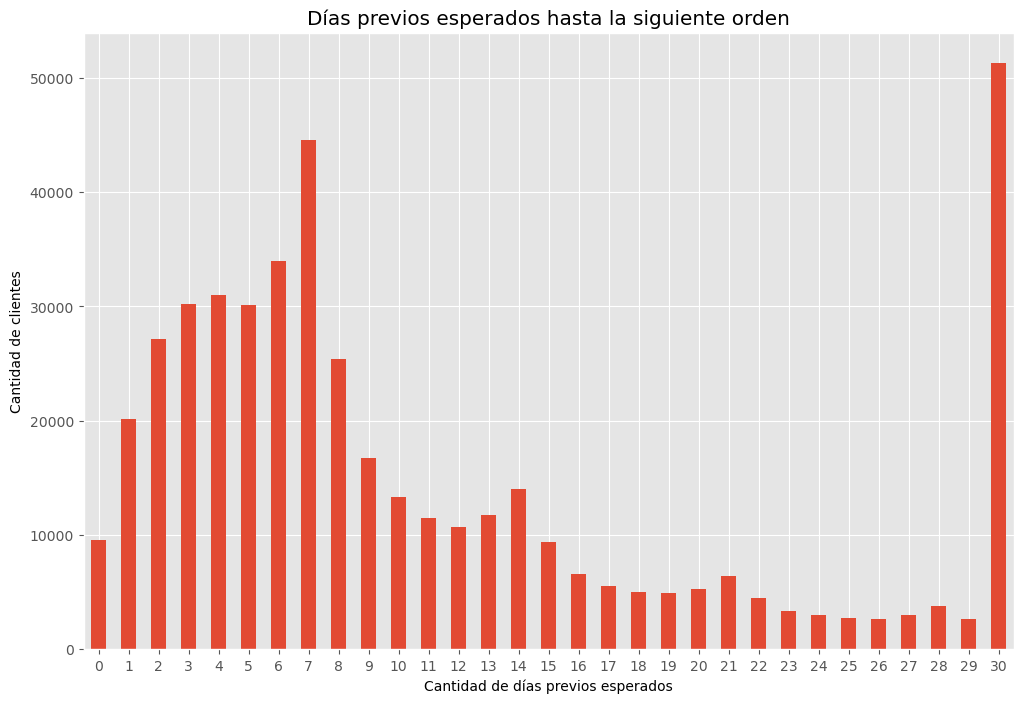

In [47]:
plt.style.use('ggplot')
freq_series = df_instacar_orders.groupby(['days_since_prior_order'])['user_id'].count()
x_labels =  [0, 1,2,3,4,5,6,7,8,9, 10,11,12,13,14,15,16,17,18,19,20,21,22,23, 24,25,26,27,28,29,30]

# Plot the figure.
plt.figure(figsize=(12, 8))
fig = freq_series.plot(kind='bar')
fig.set_title('Días previos esperados hasta la siguiente orden')
fig.set_xlabel('Cantidad de días previos esperados')
fig.set_ylabel('Cantidad de clientes')
fig.set_xticklabels(x_labels, rotation=0)
plt.show()

Escribe aquí tus conclusiones

- El rango de horario que concentra la mayor cantidad de pedidos está comprendido entre las 9 am y las 16 pm   
- Los días de la semana en los que se realizan los mayores pedidos son los domingos y los lunes
- De las cantidades de tiempo que transcurren entre un pedido y otro, la mayoría de los clientes esperan 7 días antes de realizar el siguiente pedido.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

<Axes: title={'center': 'Distribución de las órdenes los miércoles'}, xlabel='Horas del día', ylabel='Cantidad de clientes'>

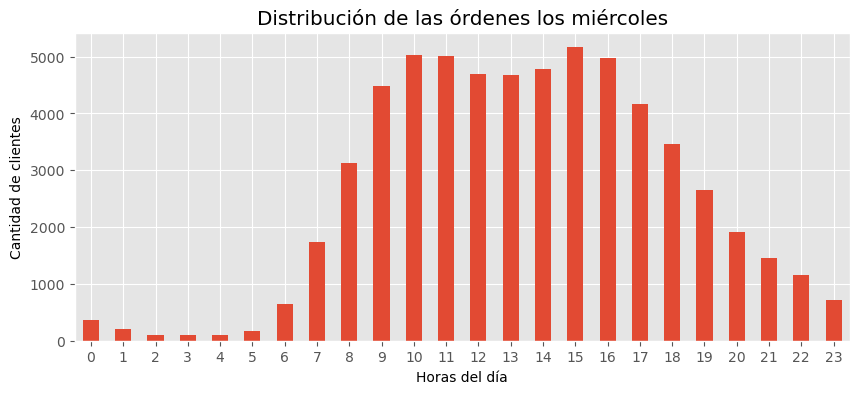

In [48]:
# Dada la leyenda en la descripción , el día miércoles corresponde al 3
df_instacar_orders[df_instacar_orders['order_dow'] == 3].groupby(['order_hour_of_day'])['user_id'].count().plot( x='order_hour_of_day',
        y='user_id',
        kind='bar',
        title='Distribución de las órdenes los miércoles',
        xlabel='Horas del día',
        ylabel='Cantidad de clientes',  legend=False, rot=0,         
        figsize=[10, 4])

<Axes: title={'center': 'Distribución de las órdenes los sábado'}, xlabel='Horas del día ', ylabel='Cantidad de clientes'>

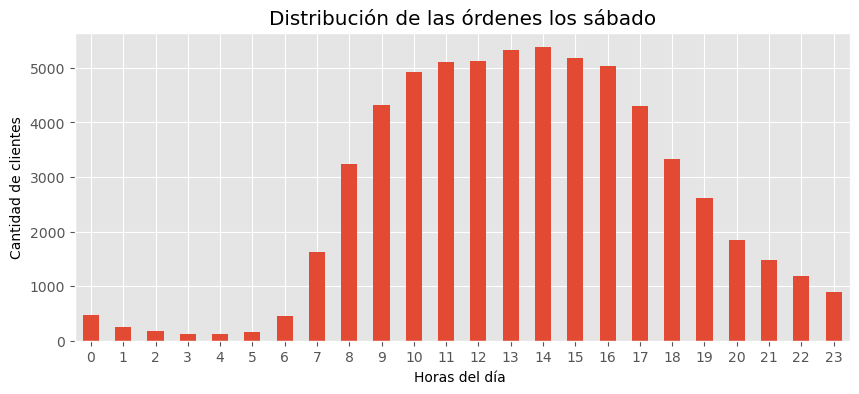

In [49]:
# Dada la leyenda en la descripción, el día sábado corresponde al 6.
df_instacar_orders[df_instacar_orders['order_dow'] == 6].groupby(['order_hour_of_day'])['user_id'].count().plot( x='order_hour_of_day',
        y='user_id',
        kind='bar',
        title='Distribución de las órdenes los sábado',
        xlabel='Horas del día ',
        ylabel='Cantidad de clientes',  legend=False, rot=0,        
        figsize=[10, 4])

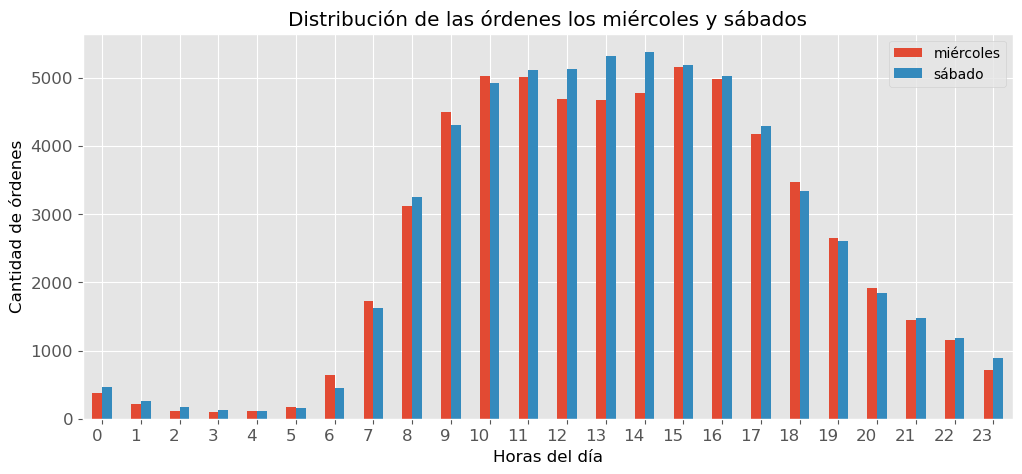

In [50]:
plt.style.use('ggplot')
x = df_instacar_orders[df_instacar_orders['order_dow'] == 3].groupby(['order_hour_of_day'])['user_id'].count()
y = df_instacar_orders[df_instacar_orders['order_dow'] == 6].groupby(['order_hour_of_day'])['user_id'].count()
labels =  0, 1,2,3,4,5,6,7,8,9, 10,11,12,13,14,15,16,17,18,19,20,21,22,23
dataa = {'miércoles': x,
        'sábado': y,
        'axis': labels
       }
df = pd.DataFrame(dataa)
ax = df[['miércoles','sábado']].plot(kind='bar', title ="Distribución de las órdenes los miércoles y sábados",figsize=(12,5),legend=True, fontsize=12)
ax.set_xlabel("Horas del día",fontsize=12)
ax.set_ylabel("Cantidad de órdenes",fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

Escribe aquí tus conclusiones

A partir del análisis de ambos gráficos de barra en la misma figura se aprecia que existen muy pocas diferencias entre las órdenes del miércoles y las del sábado, lo cual se traduciría en que los clientes realizan aproximadamente la misma cantidad de órdenes y/o pedidos en las mismas horas en esos días señalados, salvo en las horas 6, 7, 9, 10, 18, 19 y 20, en las que los pedidos del miércoles son ligeramente superiores a los del sábado, y en las horas 11, 12, 13 y 14, los pedidos del sábado superan a los del miércoles.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

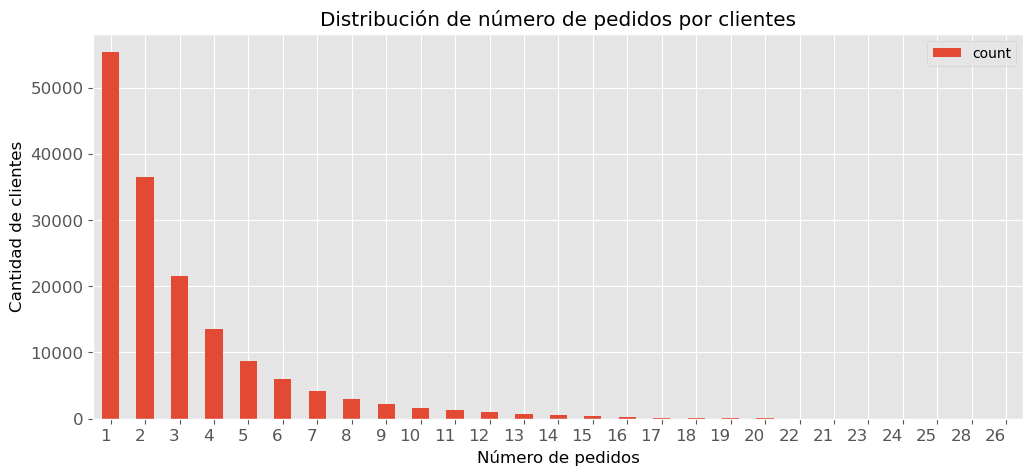

In [51]:
plt.style.use('ggplot')
a = df_instacar_orders.groupby(['user_id'])['order_id'].count().value_counts()
ax = a.plot( kind='bar', title ="Distribución de número de pedidos por clientes",figsize=(12,5),legend=True, fontsize=12)
ax.set_xlabel("Número de pedidos",fontsize=12)
ax.set_ylabel("Cantidad de clientes",fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()

Escribe aquí tus conclusiones

El gráfico muestra por cada usuario la cantidad de órdenes, y a partir del cliente con 28 órdenes va disminuyendo sucesivamente de foma escalonada, a razón de 18 clientes en los primeros escalones, luego se estabiliza el gráfico en los clientes con 21 órdenes, que es la cantidad menor de órdenes que tienen los clientes. La distribución es asimétrica positiva.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [52]:
df_products['Newcount'] = df_products['product_id'].map(df_order_products['product_id'].value_counts()) 
df= df_products.sort_values(by='Newcount', ascending=False).head(20)
df['product_name']

24851                      banana
13175      bag of organic bananas
21136        organic strawberries
21902        organic baby spinach
47208        organic hass avocado
47765             organic avocado
47625                 large lemon
16796                strawberries
26208                       limes
27844          organic whole milk
27965         organic raspberries
22934        organic yellow onion
24963              organic garlic
45006            organic zucchini
39274         organic blueberries
49682              cucumber kirby
28203          organic fuji apple
5875                organic lemon
8276     apple honeycrisp organic
40705      organic grape tomatoes
Name: product_name, dtype: object

Escribe aquí tus conclusiones

De los datos obtenidos se puede observar que la mayoría de los 20 primeros productos que a su vez son los que tienen más órdenes de compra son frutos, lo cual se traduce en que existe un fuerte interés de los clientes en la adquisición de frutos y alimentos sanos para la salud, y que es un indicativo que los clientes se interesan por incluir productos naturales en sus comidas.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [53]:
value = df_order_products.groupby(['order_id'])['order_id'].count().mean()
value

10.098983215049127

In [54]:
df_order_products_result = df_order_products.groupby(['order_id']).count().reset_index()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_32664\995175039.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_order_products_result["reordered"], bins = 100, color='red', ax=ax)


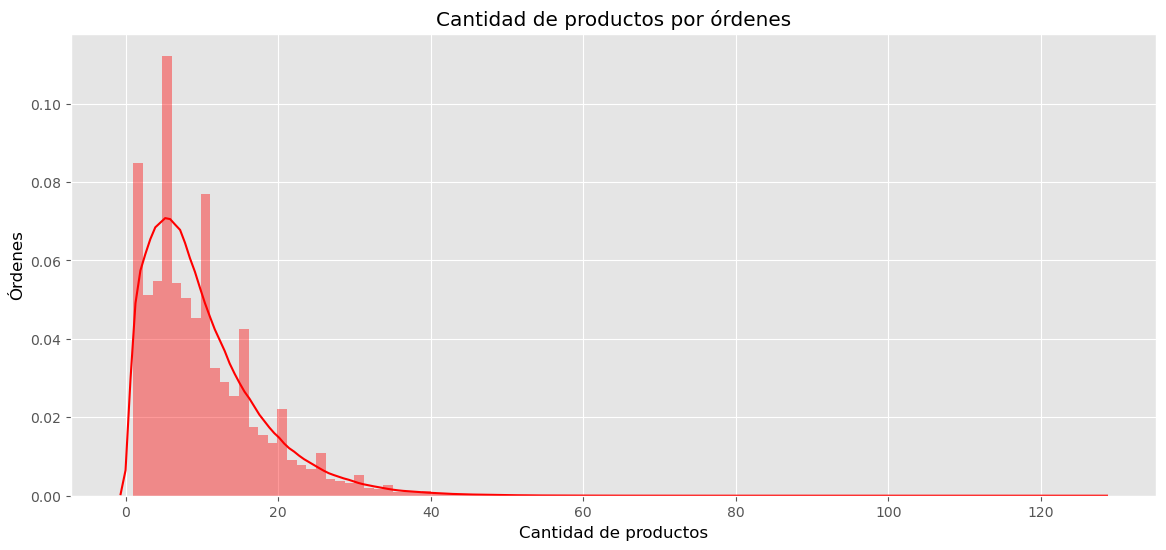

In [55]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
sns.distplot(df_order_products_result["reordered"], bins = 100, color='red', ax=ax)
ax.set_xlabel("Cantidad de productos",fontsize=12)
ax.set_ylabel("Órdenes",fontsize=12)
plt.title("Cantidad de productos por órdenes")  
plt.show()

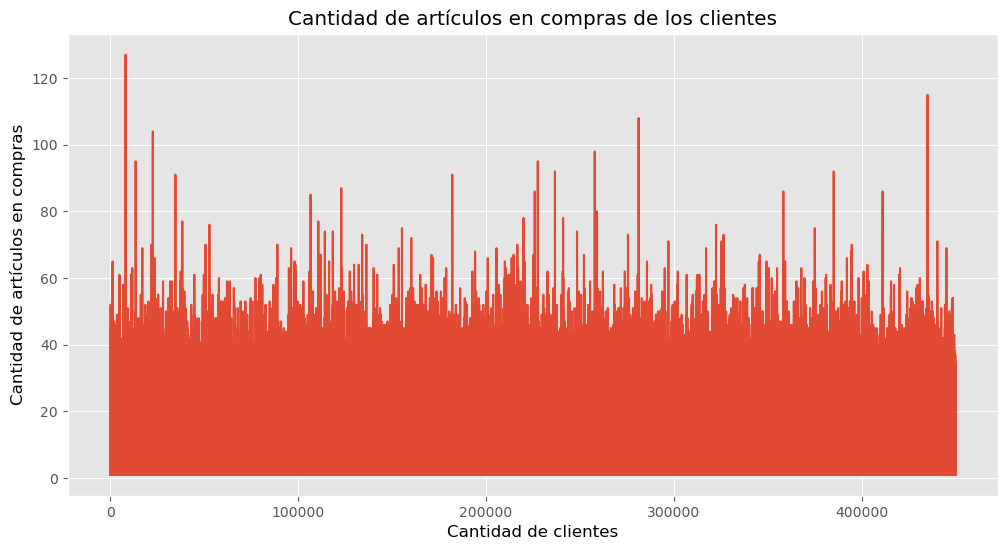

In [56]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax.set_xlabel("Cantidad de clientes",fontsize=12)
ax.set_ylabel("Cantidad de artículos en compras",fontsize=12)
df_order_products_result['reordered'].plot()
plt.title("Cantidad de artículos en compras de los clientes") 
plt.show()

In [57]:
print("Min value:  ", df_order_products_result['reordered'].min())
print("Max value: ", df_order_products_result['reordered'].max())

Min value:   1
Max value:  127


Escribe aquí tus conclusiones

Del gráfico se puede apreciar que existe una distribución asimétrica y positiva. En la cola de la distribución se encuentra un pequeño grupo de clientes que tiene una cantidad de órdenes superior al resto, y que comprenden aquellos con una cantid de órdenes por encima de 80 y hasta 127, mientras que la mayoría de los clientes se concentran en el segmento comprendido entre 1 a 60 órdenes. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [58]:
mis_booleans = (df_order_products['reordered']==1 )
ddf = df_order_products[mis_booleans].groupby('product_id')['reordered'].sum()
ddf = ddf.sort_values(ascending = False)
ddf = ddf.iloc[0:20].reset_index()
#ddf

Escribe aquí tus conclusiones

Al observar los 20 principales productos obtenidos que se consumen con  mayor frecuencia, se aprecia que todos son frutas y vegetales, lo cual denota el interés de los consumidores por este tipo de productos.    

In [59]:
df_result = ddf.merge(df_products, on= 'product_id', how = 'left') 
df_result[['product_name','reordered']]

,product_name,reordered
0,banana,55763
1,bag of organic bananas,44450
2,organic strawberries,28639
3,organic baby spinach,26233
4,organic hass avocado,23629
5,organic avocado,18743
6,organic whole milk,16251
7,large lemon,15044
8,organic raspberries,14748
9,strawberries,13945


### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [61]:
df_result = df_order_products.merge(df_products, on= 'product_id', how = 'left') 
fraction_df = df_result.groupby('product_name')['reordered'].mean()

fraction_df  

product_name
#2 coffee filters                                    0.254545
#2 cone white coffee filters                         0.000000
#2 mechanical pencils                                0.000000
#4 natural brown coffee filters                      0.358974
& go! hazelnut spread + pretzel sticks               0.466667
                                                       ...   
zzzquil alcohol-free nighttime liquid sleep aid      0.200000
zzzquil liquid warming berry flavor sleep-aid        0.285714
zzzquil nighttime liquid sleep-aid twin pack         0.636364
zzzquil nighttime sleep-aid liquicaps                0.454545
zzzquil vanilla cherry nighttime liquid sleep aid    1.000000
Name: reordered, Length: 44518, dtype: float64

Escribe aquí tus conclusiones

Lugo de observar la proporción de los productos que se solicitan reiteradamente, el producto banana sobresale con el 14.676 %, siendo este el más solicitado. 

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [62]:
ddf = df_order_products[mis_booleans].groupby('order_id')['reordered'].sum()
ddf = ddf.sort_values(ascending = False)
ddf = ddf.iloc[0:20].reset_index()
df_result = ddf.merge(df_instacar_orders, on= 'order_id', how = 'left') 
fraction_df = df_result.groupby('user_id')['reordered'].mean()
fraction_df 

user_id
3639      82.0
22836     63.0
22906     68.0
24586     68.0
60694     70.0
67094     68.0
126266    64.0
129928    80.5
137785    73.0
166743    66.0
166951    62.0
181991    68.5
186704    67.0
201268    92.5
Name: reordered, dtype: float64

Escribe aquí tus conclusiones

Al obtener la proporción de los productos por cliente, se puede observar que existen 5910 clientes que sus productos ya los habían solicitado en su totalidad, sin embargo la mayoría de los clientes tienen una proporción de productos que ya habían pedido entre 1 a un 30 %.


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [63]:
df_merged = df_products.merge(df_order_products)
mis_booleans = df_order_products['add_to_cart_order']==1 
top_20 = df_merged[mis_booleans].groupby('product_name')['product_id'].count().sort_values(ascending=False).head(20)
top_20

product_name
banana                      6380
bag of organic bananas      5354
organic strawberries        3578
organic baby spinach        3335
organic hass avocado        2923
organic avocado             2394
large lemon                 2145
strawberries                1958
limes                       1941
organic whole milk          1935
organic raspberries         1882
organic yellow onion        1669
organic garlic              1584
organic zucchini            1435
organic blueberries         1404
cucumber kirby              1311
organic lemon               1234
organic fuji apple          1227
organic grape tomatoes      1196
apple honeycrisp organic    1175
Name: product_id, dtype: int64

Escribe aquí tus conclusiones

De los principales artículos que las personas colocan primero en sus carritos de compra, se encuentran, productos de comida como son Spaghetti Style Pasta, Organic Rosemary, Simply Maize Cereal, Irish Aged Cheddar Cheese, entre otros, pero también artículos de otra índole, como son Pull Ups Girls Learning Designs Training Pants, no obstante, en su mayoría son productos de comida.   

### Conclusion general del proyecto:

Las conclusiones generales a las que se llega en el presente proyecto son:

1. La cantidad promedio de productos comprados por los clientes es 10. En el gráfico asociado a esta pregunta se puede apreciar que existe una distribución asimétrica y positiva. En la gráfica se encuentra un pequeño grupo de clientes que tiene una cantidad de productos superior al resto entre 80 a 127 órdenes y se localiza en la cola de la distribución, mientras que la mayoría de los clientes se concentran en el segmento comprendido entre 1 a 60 órdenes. 

2. Al observar los 20 principales productos obtenidos consumidos con mayor frecuencia, se aprecia que todos son frutas y vegetales, lo cual denota el interés de los consumidores por este tipo de productos.    

3. Lugo de observar la proporción de los productos que se solicitan reiteradamente, el producto banana sobresale con el 14.6 %, siendo este el más solicitado. 

4. Al obtener la proporción de los productos por cliente, se puede observar que existen 20 clientes que sus productos ya los habían solicitado en su totalidad, sin embargo, la mayoría de los clientes tienen una proporción de productos que ya habían pedido entre el 1 y el 30 %.

5. De los principales artículos que las personas colocan primero en sus carritos de compra, se encuentran productos de comida como son: Spaghetti Style Pasta, Organic Rosemary, Simply Maize Cereal, Irish Aged Cheddar Cheese, entre otros, pero también artículos de otra índole, como son Pull Ups Girls Learning Designs Training Pants, no obstante, en su mayoría son productos de comida.